# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
breastCancer = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/_deprecated_breast_cancer_wisconsin/_deprecated_breast_cancer_wisconsin.tsv.gz", sep='\t')
breastCancer.sample(10)

,target,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
362,0,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
526,0,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,...,15.35,25.16,101.90,719.8,0.1624,0.3124,0.2654,0.14270,0.3518,0.08665
155,0,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.1943,0.08211,0.3113,0.08132
119,1,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,...,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
80,0,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,...,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851
399,0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,...,13.45,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121
488,0,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,...,13.32,21.59,86.57,549.8,0.1526,0.1477,0.1490,0.09815,0.2804,0.08024
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
265,1,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,...,32.49,47.16,214.00,3432.0,0.1401,0.2644,0.3442,0.16590,0.2868,0.08218
137,0,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# Original column names
breastCancer.columns

Index(['target', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

In [5]:
# Rename columns for readability
breastCancer = breastCancer.rename(columns={
    '2': 'radius_mean', 
    '3': 'texture_mean', 
    '4': 'perimeter_mean', 
    '5': 'area_mean', 
    '6': 'smoothness_mean',
    '7': 'compactness_mean', 
    '8': 'concavity_mean', 
    '9': 'concave_points_mean', 
    '10': 'symmetry_mean', 
    '11': 'fractal_dimension_mean',
    '12': 'radius_SE',
    '13': 'texture_SE',
    '14': 'perimeter_SE',
    '15': 'area_SE',
    '16': 'smoothness_SE',
    '17': 'compactness_SE',
    '18': 'concavity_SE',
    '19': 'concave_points_SE',
    '20': 'symmetry_SE',
    '21': 'fractal_dimension_SE',
    '22': 'radius_worst',
    '23': 'texture_worst',
    '24': 'perimeter_worst',
    '25': 'area_worst',
    '26': 'smoothness_worst',
    '27': 'compactness_worst',
    '28': 'concavity_worst',
    '29': 'concave_points_worst',
    '30': 'symmetry_worst',
    '31': 'fractal_dimension_worst'
})

breastCancer.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE',
       'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE',
       'fractal_dimension_SE', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Breast Mass Diagnosis Features

**`target`**: Used to diagnose breast masses. The target feature is the **Diagnosis** of the breast mass. (0 = *Benign*, 1 = *Malignant*)

---

### Size Features and Shape Features

**2. `radius_mean`**: The mean radius of the nuclei in the sample, measured from the center to points on the perimeter. 

**4. `perimeter_mean`**: The mean perimeter of the nuclei in the sample.

**5. `area_mean`**: The mean area of the nuclei in the sample.

**12. `radius_SE`**: The standard error of the radius of the nuclei in the sample, measured from the center to points on the perimeter.

**14. `perimeter_SE`**: The standard error of the perimeter of the nuclei in the sample.

**15. `area_SE`**: The standard error of the area of the nuclei in the sample.

**22. `radius_worst`**: The **"worst"** (mean of 3 largest values) radius of the nuclei in the sample, measured from the center to points on the perimeter.

**24. `perimeter_worst`**: The **"worst"** (mean of 3 largest values) perimeter of the nuclei in the sample.

**25. `area_worst`**: The **"worst"** (mean of 3 largest values) area of the nuclei in the sample.

---

## Shape Features

**6. `smoothness_mean`**: The mean local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**7. `compactness_mean`** ($perimeter^2/area - 1.0$): Measures the mean compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**10. `symmetry_mean`**: The mean symmetry of the nuclei shapes in the sample.

**16. `smoothness_SE`**: The standard error local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**17. `compactness_SE`** ($perimeter^2/area - 1.0$): Measures the standard error compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**20. `symmetry_SE`**: The standard error symmetry of the nuclei shapes in the sample.

**26. `smoothness_worst`**: The **"worst"** (mean of 3 largest values) local variation in radius lengths of the nuclei in the sample. The higher the number, the **"rougher"** the contour.

**27. `compactness_worst`** ($perimeter^2/area - 1.0$): The **"worst"** (mean of 3 largest values) compactness of the nuclei in the sample. The higher the number, the more **irregular** the contour.

**30. `symmetry_worst`**: The **"worst"** (mean of 3 largest values) symmetry of the nuclei shapes in the sample.

---

### Contour (Edge) Irregularity Features

**8. `concavity_mean`**: The mean severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**9. `concave_points_mean`**: The mean amount of concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**11. `fractal_dimension_mean`**: The mean irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

**18. `concavity_SE`**: The standard error severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**19. `concave_points_SE`**: The standard error concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**21. `fractal_dimension_SE`**: The standard error irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

**28. `concavity_worst`**: The **"worst"** (mean of 3 largest values) severity of concave portions of the contour. This measures the indentations of the nuclei in the sample.

**29. `concave_points_worst`**: The **"worst"** (mean of 3 largest values) concave portions of the contour in the sample. This measures the number of "dips" or indentations in the nuclei contour.

**31. `fractal_dimension_worst`**: The **"worst"** (mean of 3 largest values) irregularity of the nuclei contour using *"coastline approximation" - 1*. High fractal dimension means the nuclei have a more complex, jagged countour. Low fractal dimension means the nuclei have a more smooth, simple contour.

---

### Texture Feature

**3. `texture_mean`**: is the mean standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

**13. `texture_SE`**: The standard error of the standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

**23. `texture_worst`**: The **"worst"** (mean of 3 largest values) standard deviation of gray-scale values of the nuclei in the sample. This essentially measures the irregularity of the surface texture.

---

#### Measurements

* Mean: $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$

* Standard Error: $\frac{\sigma}{\sqrt{n}}$

* Worst: mean of 3 largest values

---

#### Sources

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

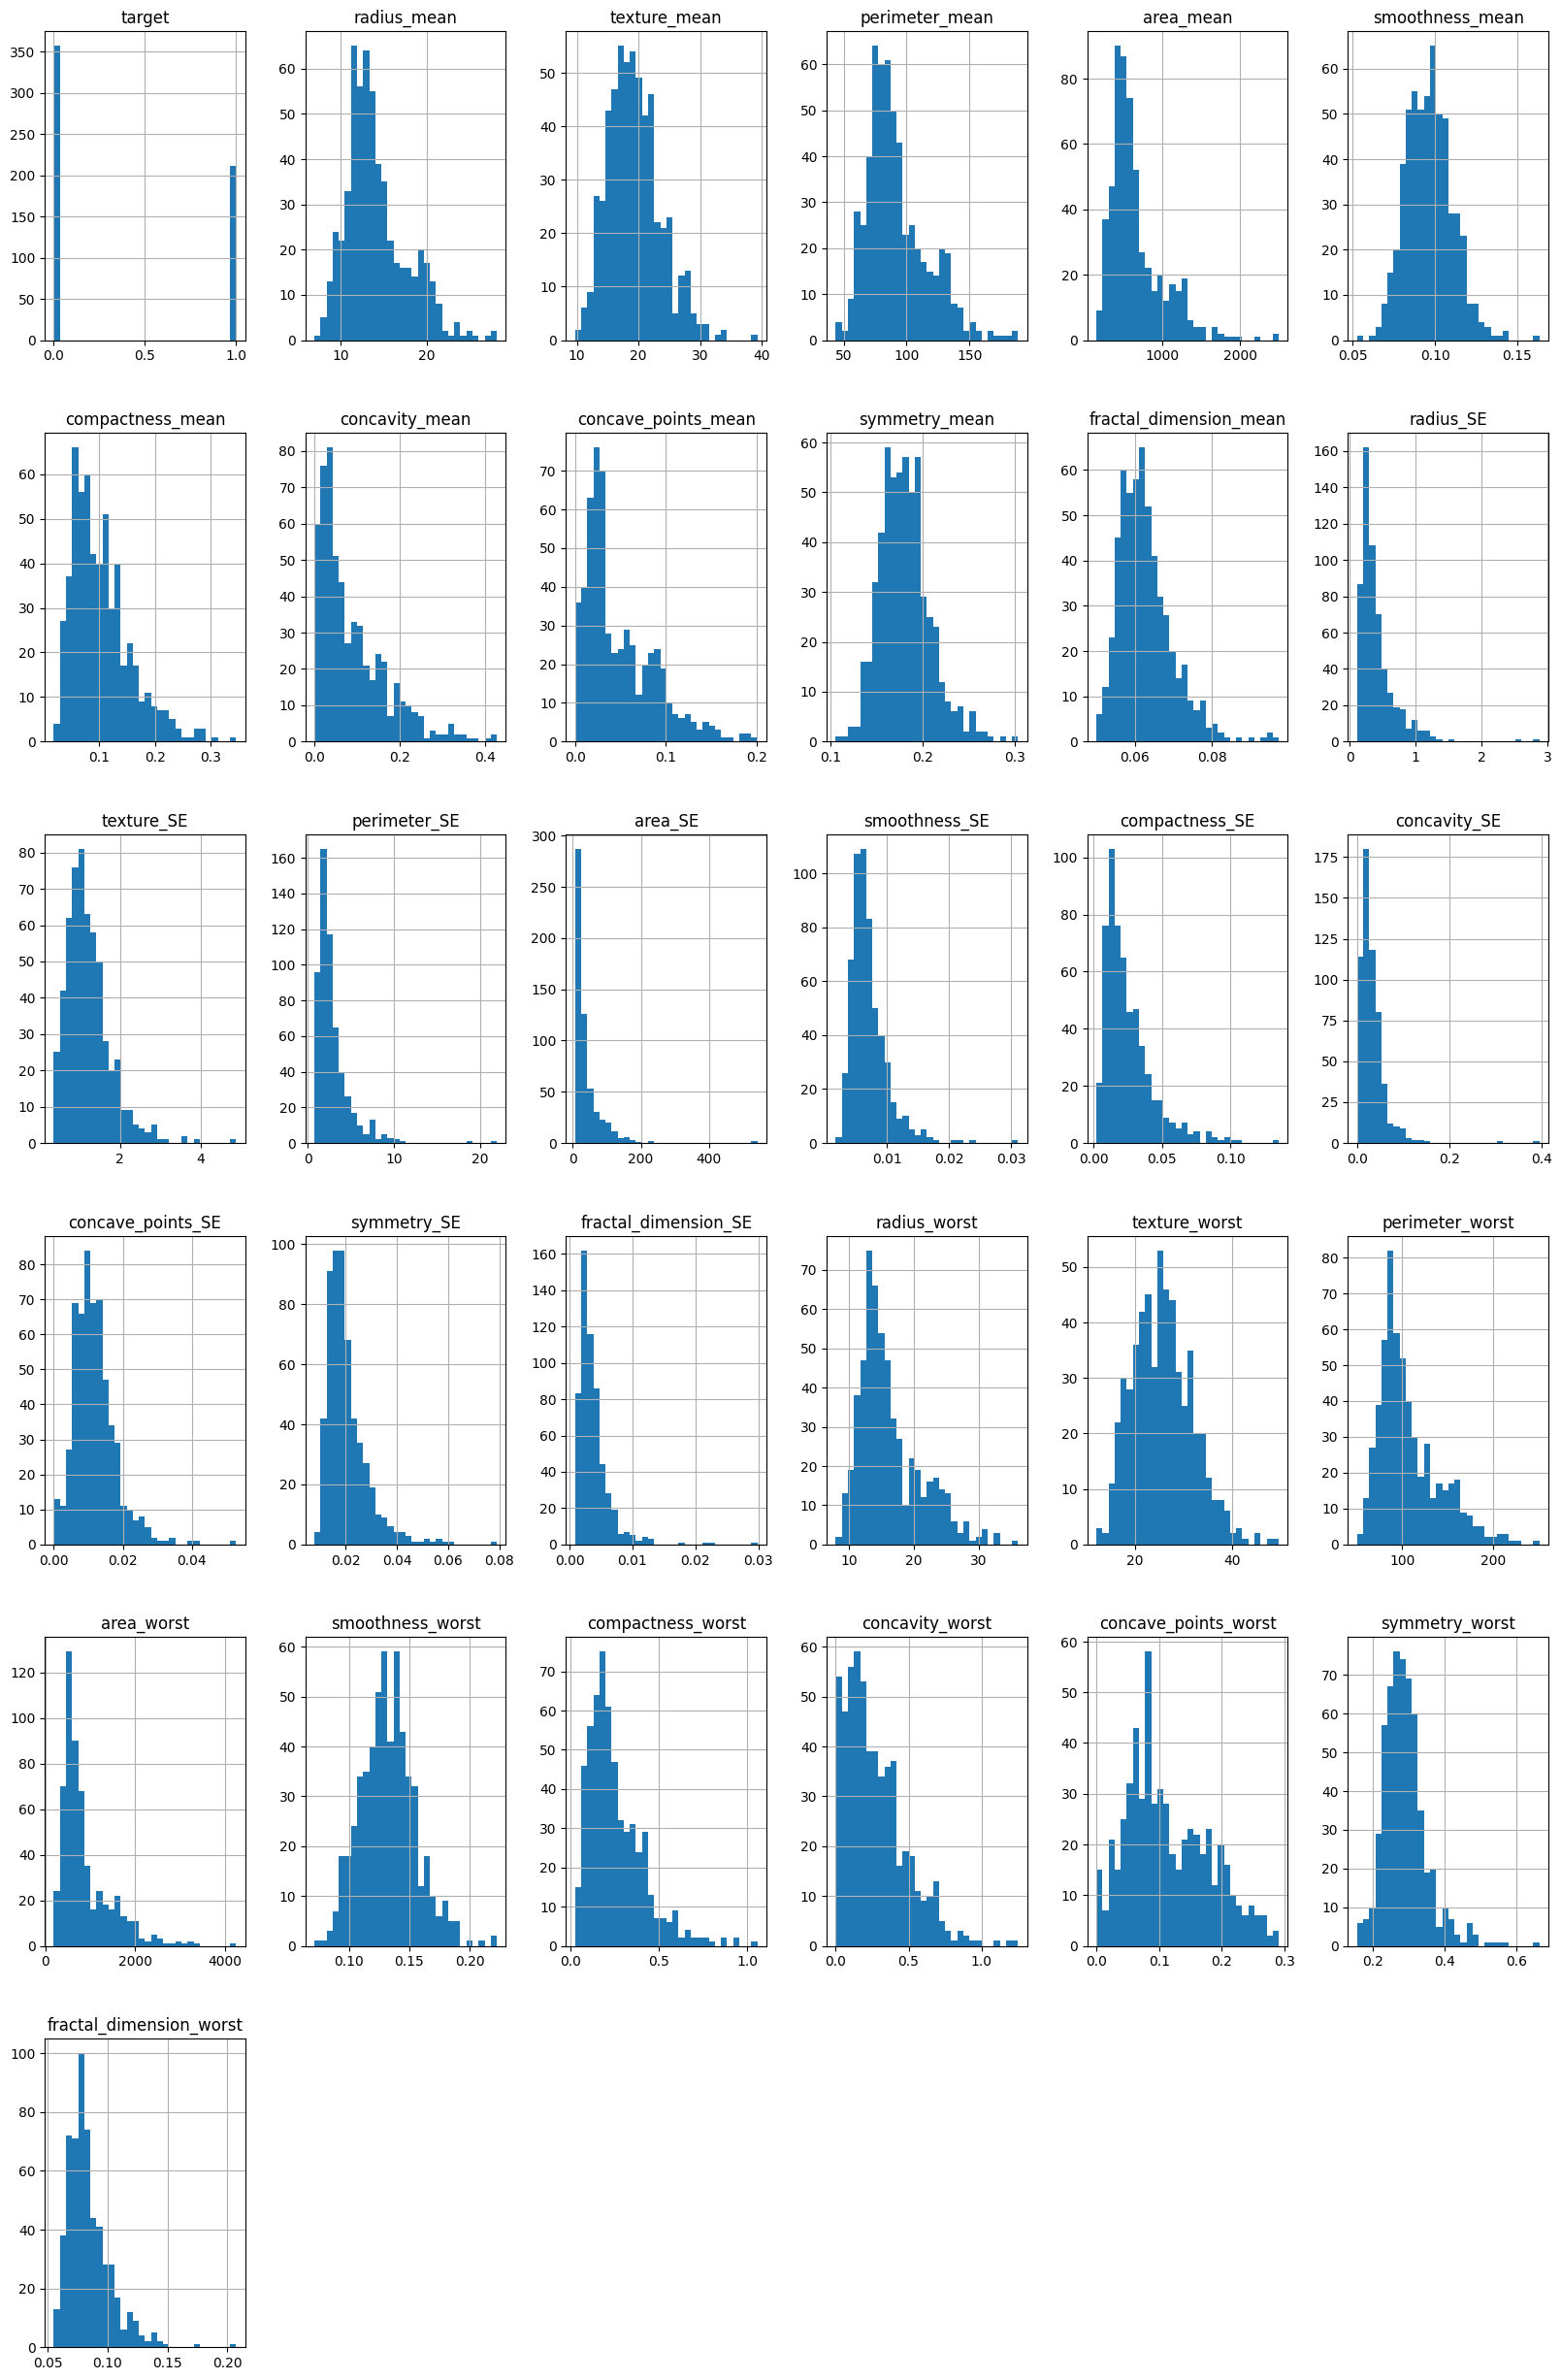

In [6]:
# YOUR CODE HERE
num_cols = len(breastCancer.columns)
breastCancer.hist(bins=30, figsize=(20, num_cols))
None

`target`: Binary distribution with more than 350 benign samples and more than 200 malignant samples

`radius_mean`: Right skewed distribution (majority of samples between 10 and 20)

`texture_mean`: Slightly right skewed distribution (majority of samples are somewhat evely distributed between 15 and 25)

`perimeter_mean`: Right skewed distribution (majority of samples are between 75 and 125)

`area_mean`: Strong right skewed distribution (majority of samples are between 100 and 1000)

`smoothness_mean`: Close to a normal distribution (majority of samples are between 0.075 and 0.125)

`compactness_mean`: Strong right skewed distribution (majority of samples are between 0 and 0.15)

`concavity_mean`: Very strong right skewed distribution (majority of samples are between 0 and 0.2)

`concave_points_mean`: Strong right skewed distribution (majority of samples are between 0 and 0.1)

`symmetry_mean`: Close to a normal distribution with a slight right skew (majority of samples between 0.15 and 0.225)

`fractal_dimension_mean`: Strong right skewed distribution (majority of samples between 0.03 and 0.07)

`radius_SE`: Very strong right skewed distribution (majority of samples are between 0 and 1)

`texture_SE`: Strong right skewed distribution (majority of samples are between 0 and 2)

`perimeter_SE`: Very strong right skewed distribution (majority of samples are between 0 and 5)

`area_SE`: Very strong right skewed distribution (majority of samples below 100)

`smoothness_SE`: Strong right skewed distribution (majority of samples below 0.01)

`compactness_SE`: Strong right skewed distribution (majority of samples below 0.05)

`concavity_SE`: Very strong right skewed distribution (majority of samples below 0.01)

`concave_points_SE`: Strong right skewed distribution (majority of samples between 0 and 0.02)

`symmetry_SE`: Strong right skewed distribution (majority of samples between 0 and 0.03)

`fractal_dimension_SE`: Very strong right skewed distribution (majority of samples between 0 and 0.01)

`radius_worst`: Strong right skewed distribution (majority between 10 and 20, however there's still a significant amount of samples between 20 and 30)

`texture_worst`: Close to a normal distribution (slightly right skewed with the majority of samples between 10 and 35)

`perimeter_worst`: Right skewed distribution (majority of samples between 50 and 150)

`area_worst`: Very strong right skewed distribution (majority of samples between 0 and 1000)

`smoothness_worst`: Close to a normal distribution with a slight right skew (majority of samples between 0.10 and 0.15)

`compactness_worst`: Strong right skewed distribution (majority of samples between 0 and 0.5)

`concavity_worst`: Strong right skewed distribution (majority of samples between 0 and 0.5)

`concave_points_worst`: Right skewed distribution but there is a lot of variation between the samples since the samples are distributed throughout

`symmetry_worst`: Strong right skewed distribution (majority of the samples are between 0.2 and 0.4)

`fractal_dimension_worst`: Strong right skewed distribution (majority of samples are between 0.05 and 0.10)

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

c:\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


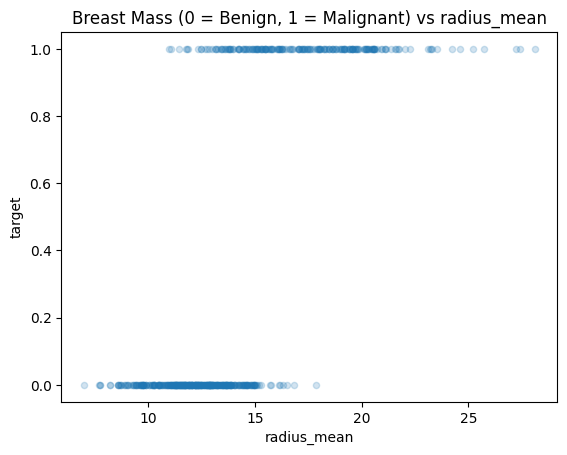

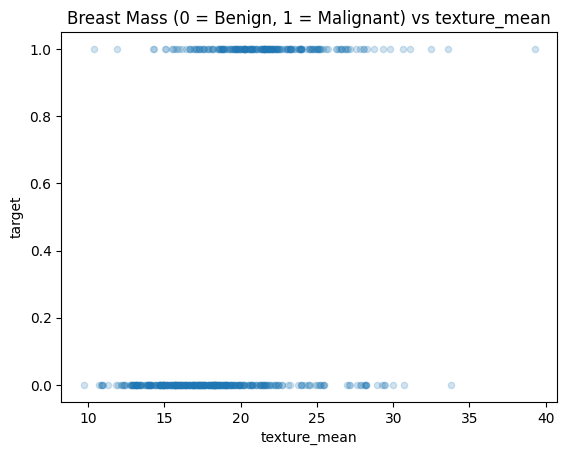

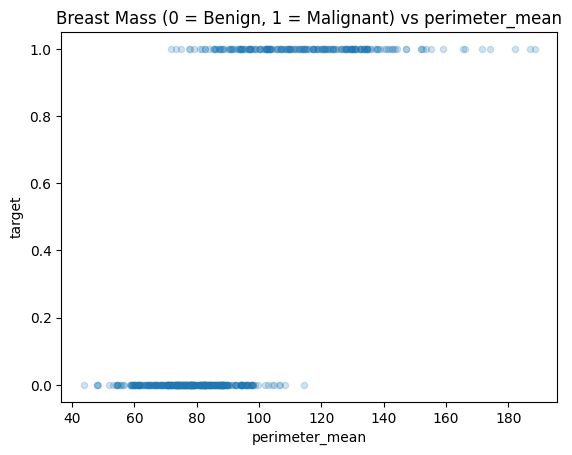

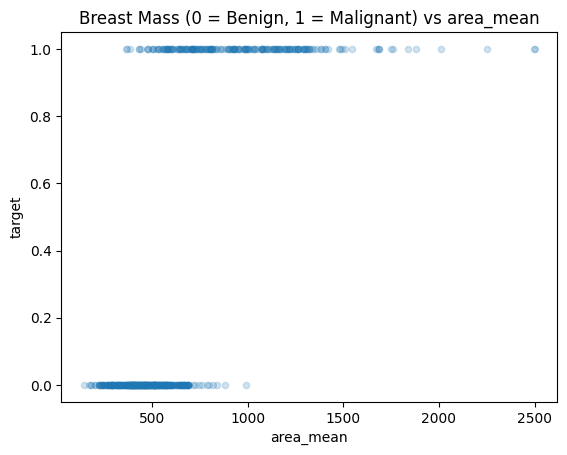

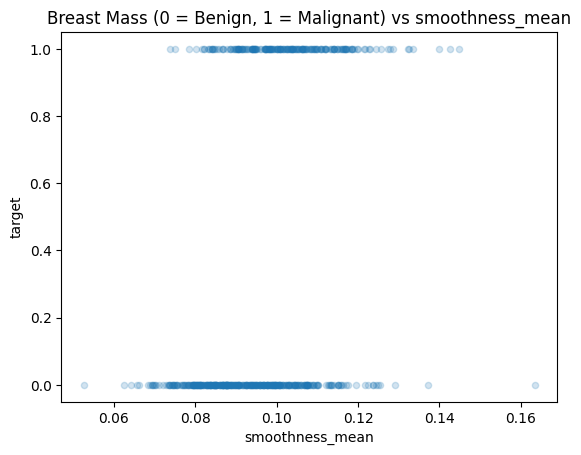

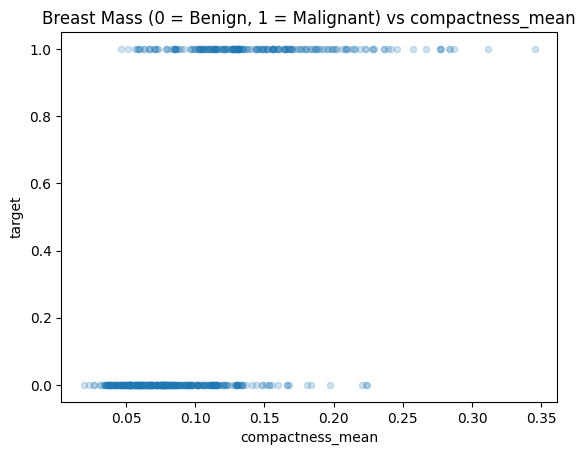

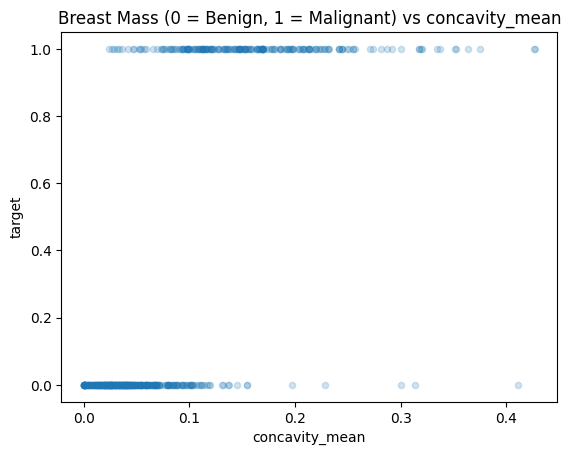

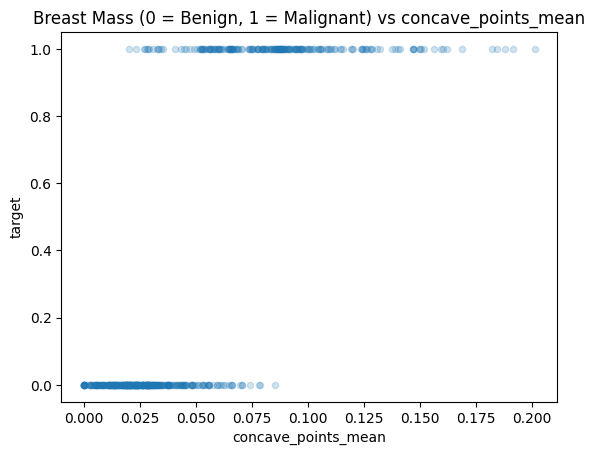

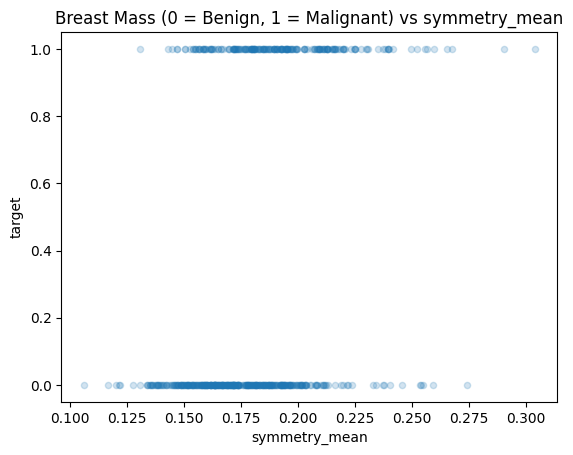

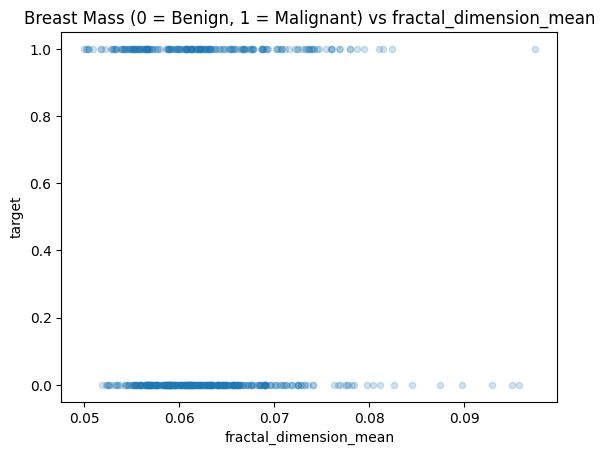

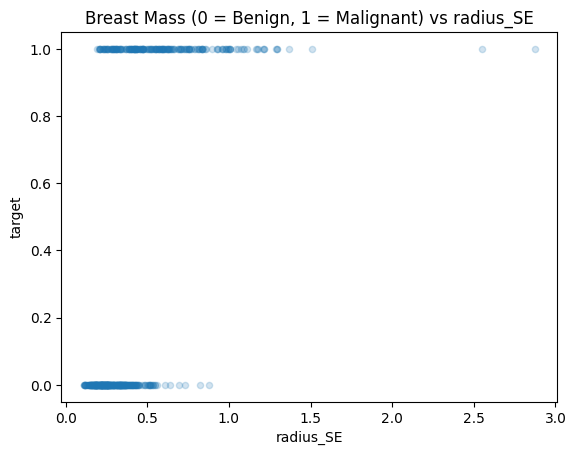

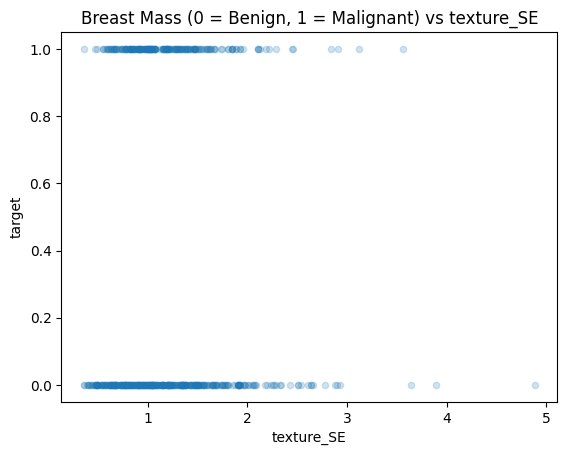

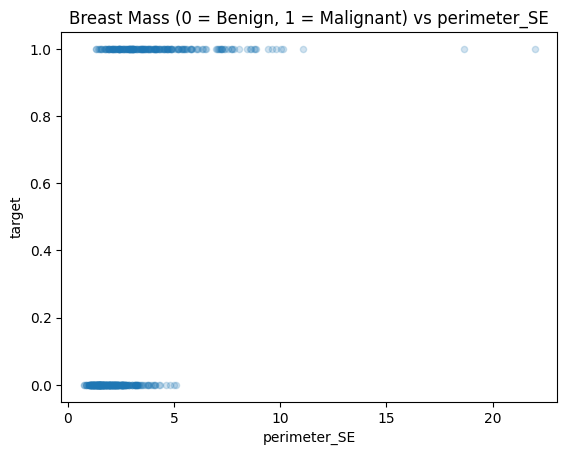

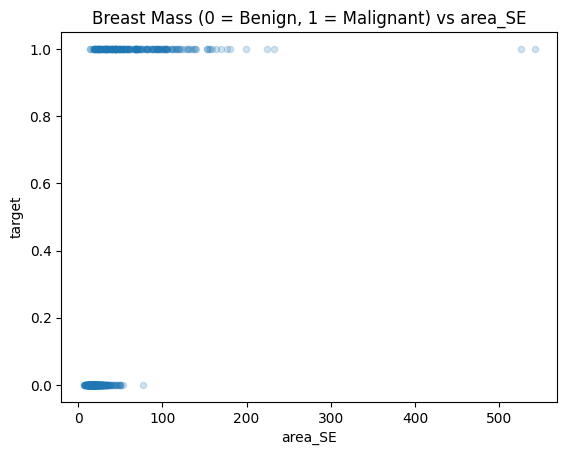

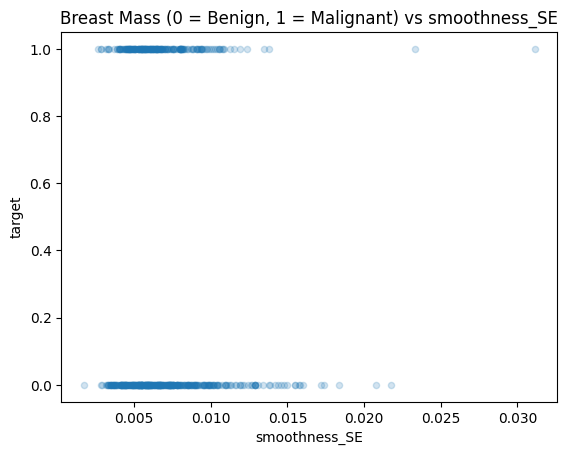

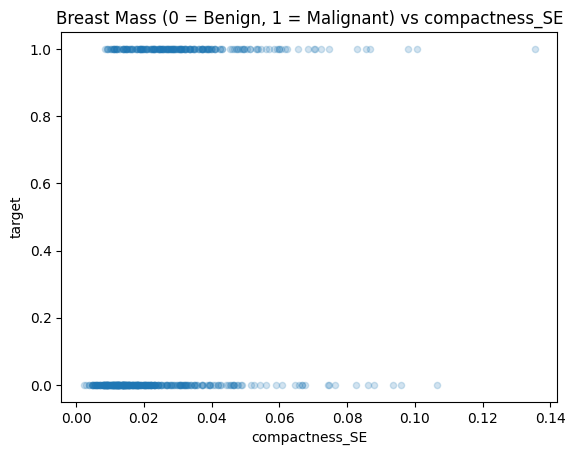

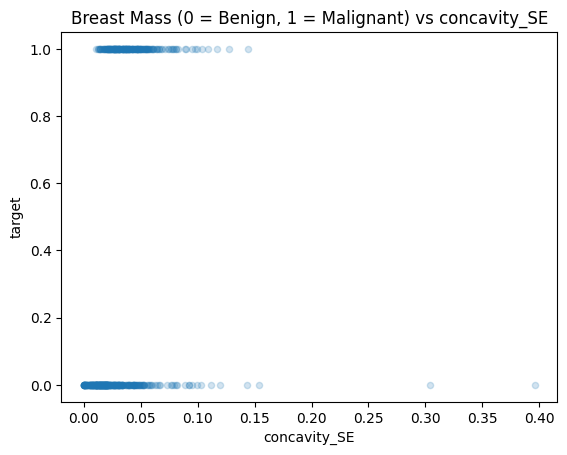

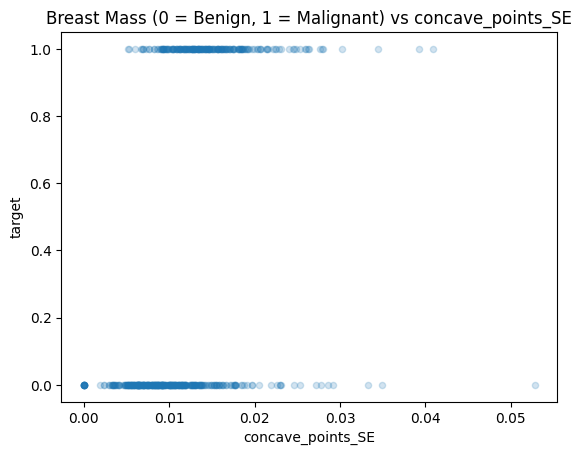

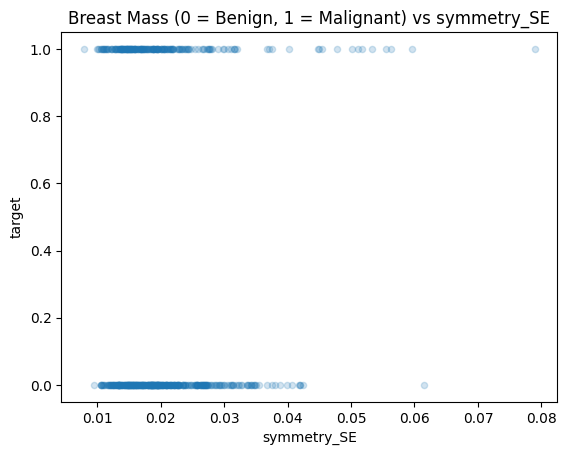

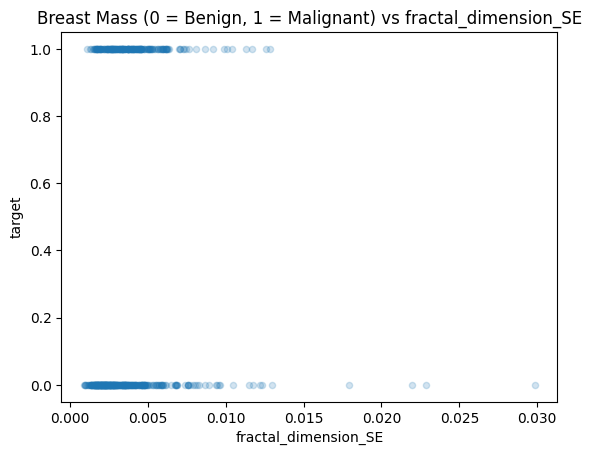

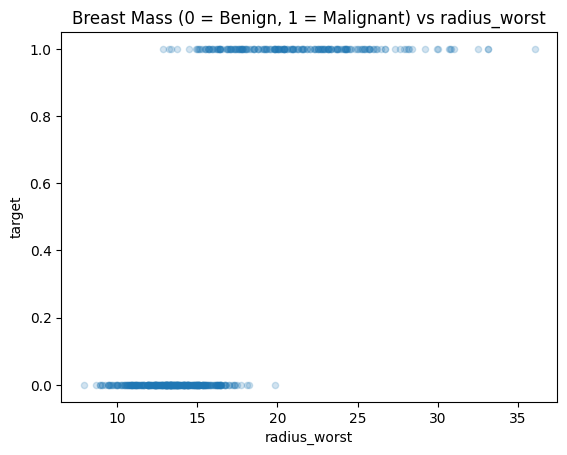

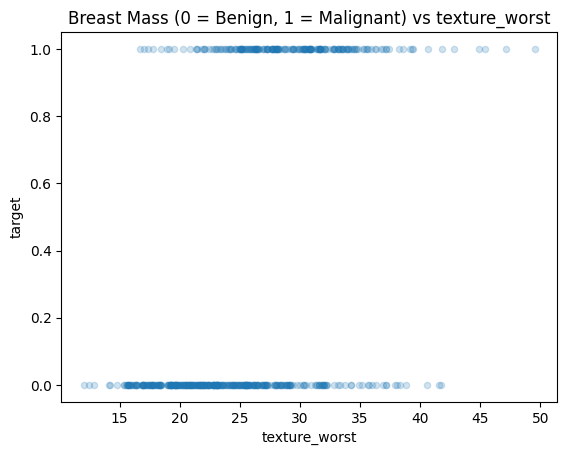

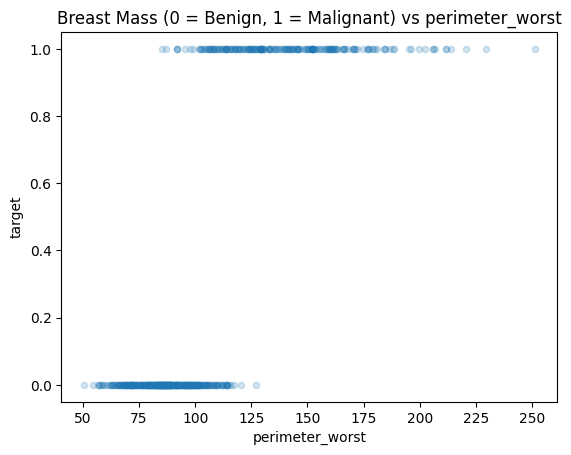

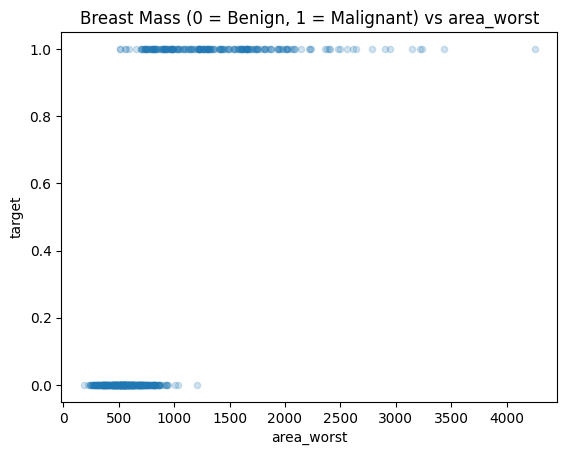

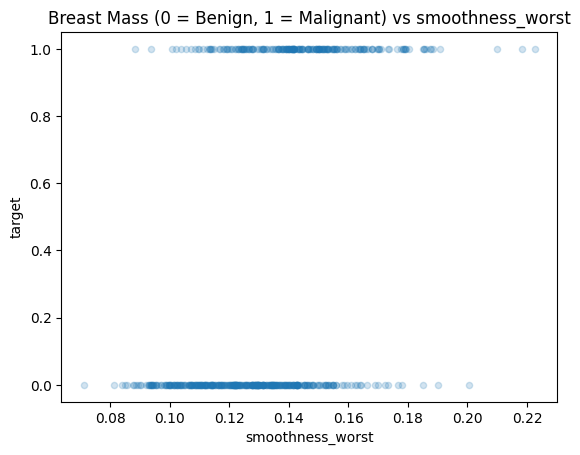

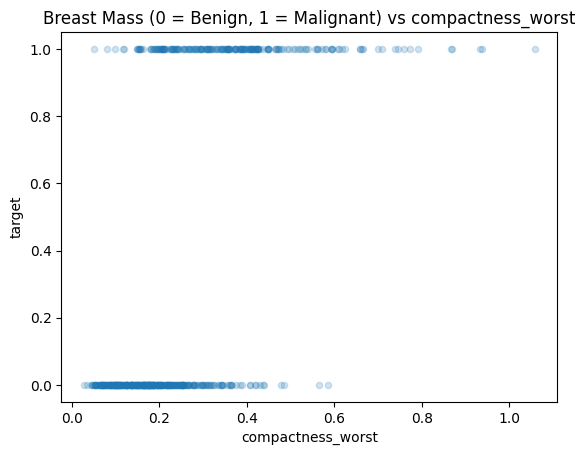

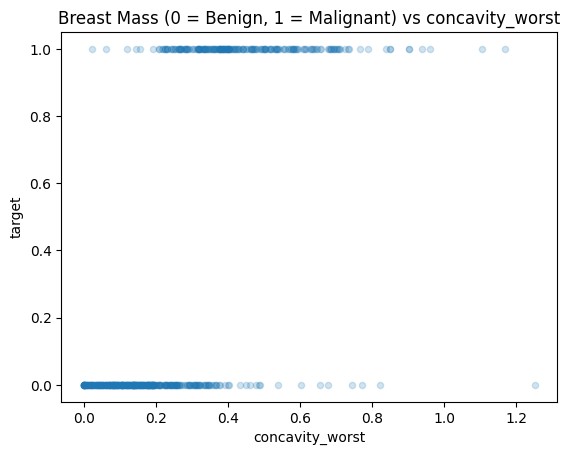

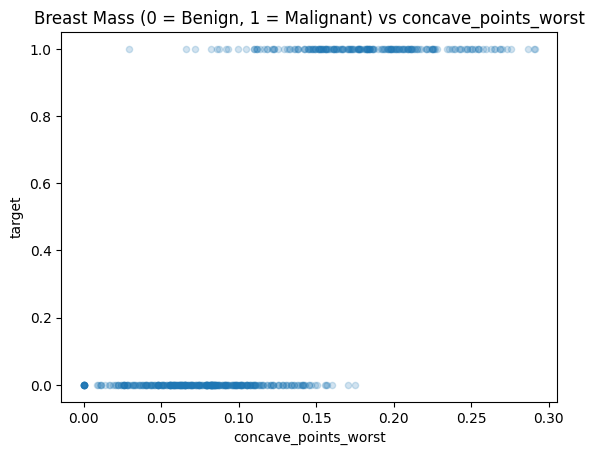

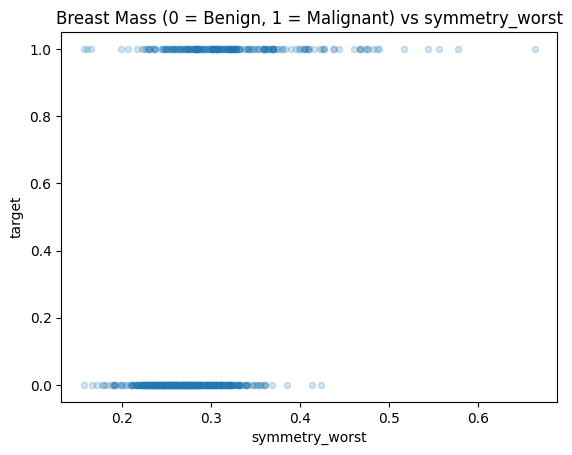

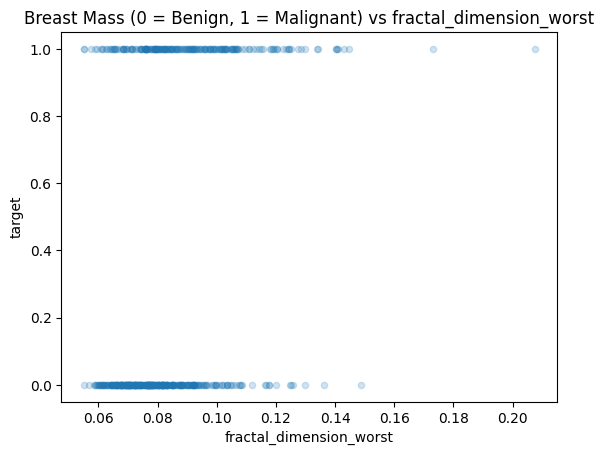

In [18]:
for c in breastCancer.columns:
    if c == 'target':
        continue

    breastCancer.plot.scatter(c, "target", alpha=0.2)
    plt.xlabel(c)
    plt.ylabel('target')
    plt.title(f"Breast Mass (0 = Benign, 1 = Malignant) vs {c}")
    None


YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [8]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [9]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [10]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [11]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [13]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE